In [1]:
import pandas as pd
import geopandas as gpd
# Transantiago's travels public submit
url = 'https://github.com/diegocaro/tallerds/raw/master/notebooks/origen_destino_stgo_2012/EOD_STGO/viajes.csv'
viajes = pd.read_csv(url, sep=';', decimal=',', index_col=['Viaje'])

In [2]:
# Let's work with a sample to save computing time
data_cols = ['OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY']
drop_cols = [x for x in list(viajes.columns) if x not in data_cols]
viajes_sample = viajes.drop(columns=drop_cols).replace(0, None).dropna().drop_duplicates().sample(n=8000)

# Check size
viajes_sample.shape

(8000, 4)

In [3]:
# Remove travels from/to outside the city, so the plot don't have to scale way outside the city

limit_n = 6316000
limit_s = 6278000
limit_w =  332000
limit_e =  368000

query = '@limit_s < OrigenCoordY < @limit_n'
query += ' and @limit_s < DestinoCoordY < @limit_n'
query += ' and @limit_w < OrigenCoordX < @limit_e'
query += ' and @limit_w < DestinoCoordX < @limit_e'

viajes_city = viajes_sample.query(query)

# Check size
viajes_city.shape

(7031, 4)

In [69]:
viajes_city.values

array([[ 338048.3438, 6296213.    ,  334456.8438, 6299953.    ],
       [ 357784.7188, 6305682.5   ,  358083.    , 6305949.5   ],
       [ 348751.    , 6289472.    ,  346694.    , 6293596.5   ],
       ...,
       [ 352352.3125, 6278302.    ,  352128.9375, 6278225.    ],
       [ 341553.9688, 6296494.    ,  345982.5   , 6298929.    ],
       [ 350582.0938, 6298954.5   ,  353533.5   , 6282578.    ]])

In [177]:
import xnetwork as xnet
g = xnet.xnet2igraph("../Data/Networks/network_ATLAS_1985_2015_geo.xnet")

In [178]:
import numpy as np
positions = np.array(g.vs["Position"])

In [179]:
g.edge_attributes()

['weight', 'year']

In [180]:
edgesValues = []
weigths = []
for edge in g.es():
  weigth = edge["weight"]
  if(weigth>0.04):
    sourcePosition = positions[edge.source];
    targetPosition = positions[edge.target];
    edgesValues.append([sourcePosition[0],sourcePosition[1],targetPosition[0],targetPosition[1]]);
    weigths.append(weigth)
edgesValues = np.array(edgesValues)
len(edgesValues)

In [ ]:
import ForcedirectedEdgeBundling as feb
feb.S_initial = 1
# edgesValues = np.array([[0,0,20,80],[0,80,20,0]])
edges = feb.array2edges(edgesValues*100)
# Check size (small edges are removed)
len(edges)
import usageHelper
%matplotlib inline

# Plot raw for comparison
input_lines = feb.edges2lines(edges)
# plot_lines_on_map(input_lines, footer='Raw commuting trips')

# Plot trips after Force-directed Edge Bungling
# usageHelper.plot_lines_on_map(output_lines, footer='Commuting trips processed with Force-directed Edge Bungling')

# lowe compatibility threshold
compatibility_threshold = 0.5

%time output_lines = feb.forcebundle(edges)
input_lines = output_lines

In [ ]:

import matplotlib.pyplot as plt
lines = [];
figsize=(18, 18);
footer=None;
save_filename="../Figures/testmap.pdf";
zoom=4
for edge_idx, edge in enumerate(input_lines):
    points = []

    for point in edge:
        points.append(Point(point.x/100, point.y/100))

    lines.append(LineString(points))

points = []
for pos in positions:
  points.append(Point(pos[0], pos[1]))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gpd.GeoSeries(lines)
gdfPoints = gpd.GeoSeries(points)
gdf.crs = {'init': 'epsg:5361'}
# gdf = gdf.to_crs({'init': 'epsg:3857'})
ax = world.plot(figsize=figsize,color='#bbbbbb')
gdf.plot(linewidth=0.5, color='#ff2222',ax=ax, alpha=0.10)
gdfPoints.plot(linewidth=0.0,ax=ax, markersize=10, color='#222222', alpha=1.0,zorder=5)
xmin, xmax, ymin, ymax = ax.axis()
# basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom,source=ctx.providers.Stamen.Toner)
# ax.imshow(basemap, extent=extent, interpolation='bilinear')
# restore original x/y limits
ax.axis((xmin, xmax, ymin, ymax))

# ctx.add_basemap(ax)
#ax.set_xlim(-7885000, -7840000)
# ax.set_ylim(-33.65, -33.3)
plt.axis('off')
if footer:
    ax.set_title(footer)
#plt.annotate('texto', (0, 0), (.5, .01), fontsize=14, textcoords='axes fraction')
if save_filename:
    plt.savefig(save_filename, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# # Overwrite default hyper-parameters:
# #
# # higher initial distance to move points
# feb.S_initial = 50
# # lowe compatibility threshold
# compatibility_threshold = 0.5

# %time output_lines = feb.forcebundle(edges)



CPU times: user 1min 46s, sys: 52.6 ms, total: 1min 46s
Wall time: 1min 46s


In [40]:
# %matplotlib inline

# import contextily as cx
# import geopandas
# import rasterio
# from rasterio.plot import show as rioshow
# import matplotlib.pyplot as plt
# data_url = "https://ndownloader.figshare.com/files/20232174"
# db = geopandas.read_file(data_url)
# ax = db.plot(color="red", figsize=(9, 9))
# cx.add_basemap(ax, crs=db.crs.to_string())


In [7]:

# import geopandas as gpd
# from shapely.geometry import LineString, Point
# import contextily as ctx

# def add_basemap(ax, zoom, crs="EPSG:25830"):
# #     xmin, xmax, ymin, ymax = ax.axis()
# #     basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom)
# #     ax.imshow(basemap, extent=extent, interpolation='bilinear')
# #     # restore original x/y limits
# #     ax.axis((xmin, xmax, ymin, ymax))
#   ctx.add_basemap(ax, crs=db.crs.to_string())


# def plot_lines_on_map(input_lines, figsize=(18, 18), footer=None, save_filename=None):
#     lines = []
#     for edge_idx, edge in enumerate(input_lines):
#         points = []

#         for point in edge:
#             points.append(Point(point.x, point.y))

#         lines.append(LineString(points))
    
#     gdf = gpd.GeoSeries(lines)
#     gdf.crs = {'init': 'epsg:5361'}
#     gdf = gdf.to_crs({'init': 'epsg:3857'})
#     ax = gdf.plot(linewidth=.2, color='#ff2222', figsize=figsize, alpha=0.3)
#     add_basemap(ax, zoom=12)
#     #ax.set_xlim(-7885000, -7840000)
#     # ax.set_ylim(-33.65, -33.3)
#     plt.axis('off')
#     if footer:
#         ax.set_title(footer)
#     #plt.annotate('texto', (0, 0), (.5, .01), fontsize=14, textcoords='axes fraction')
#     if save_filename:
#         plt.savefig(save_filename, bbox_inches='tight')
#     plt.show()
#     plt.close()

/N/slate/filsilva/miniconda3/envs/inspiredata/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


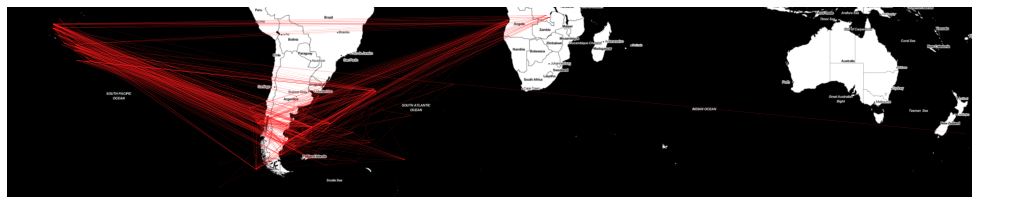